11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


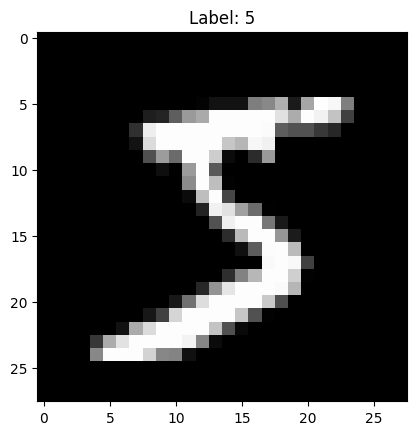

In [13]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt

# Load MNIST from Keras datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Show a sample image
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


In [14]:
# Normalize the data (0–255 → 0–1 range)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN (add a channel dimension: grayscale = 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [15]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes
])


d:\PYTHON\Research\DL\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [17]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8974 - loss: 0.3349 - val_accuracy: 0.9833 - val_loss: 0.0523
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9844 - loss: 0.0508 - val_accuracy: 0.9835 - val_loss: 0.0547
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9901 - loss: 0.0319 - val_accuracy: 0.9900 - val_loss: 0.0343
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9919 - loss: 0.0239 - val_accuracy: 0.9893 - val_loss: 0.0346
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9944 - loss: 0.0169 - val_accuracy: 0.9905 - val_loss: 0.0331


In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9880 - loss: 0.0344
Test Accuracy: 0.9912


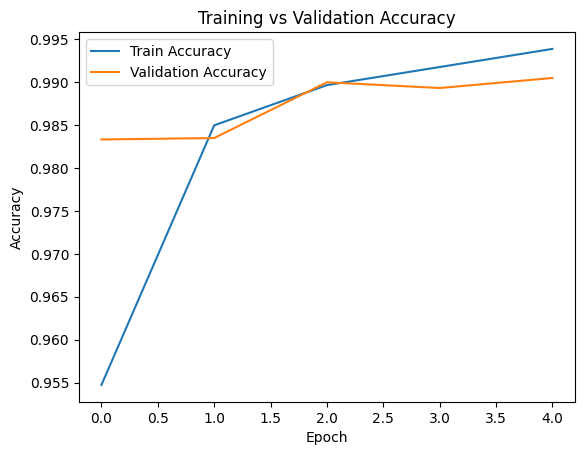

In [19]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()
